GOLD PRICE PREDICTION


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
df=pd.read_csv(r"C:\Users\trilo\Downloads\gld_price_data.csv")

In [3]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
df.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [9]:
df.shape

(2290, 6)

In [10]:
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [11]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Date
['1/2/2008' '1/3/2008' '1/4/2008' ... '5/10/2018' '5/14/2018' '5/16/2018']


In [13]:
features_na=[features for features in df.columns if df[features].isnull().sum() > 0]
for features in features_na:
    print(feature,np.round(df[feature].isnull().mean(), 4), '% missing values')
else:
    print("No missing value found")

No missing value found


In [14]:
for column in df.columns:
    print(column,df[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


In [15]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='0') & (feature not in ['GLD']))]
categorical_features

[]

In [16]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

In [17]:
numerical_features = [feature for feature in df.columns if((df[feature].dtypes != '0')& (feature not in ['GLD']))]
print('Number of numerical variables: ',len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  5


,Date,SPX,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,76.059998,15.590,1.557099


In [18]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete variables count: {}".format(len(discrete_feature)))

Discrete variables count: 0


In [19]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+['GOD']]
print("Continuous feature count {} ".format(len(continuous_features)))

Continuous feature count 5 


In [20]:
df1 = df.drop(['Date'],axis=1)

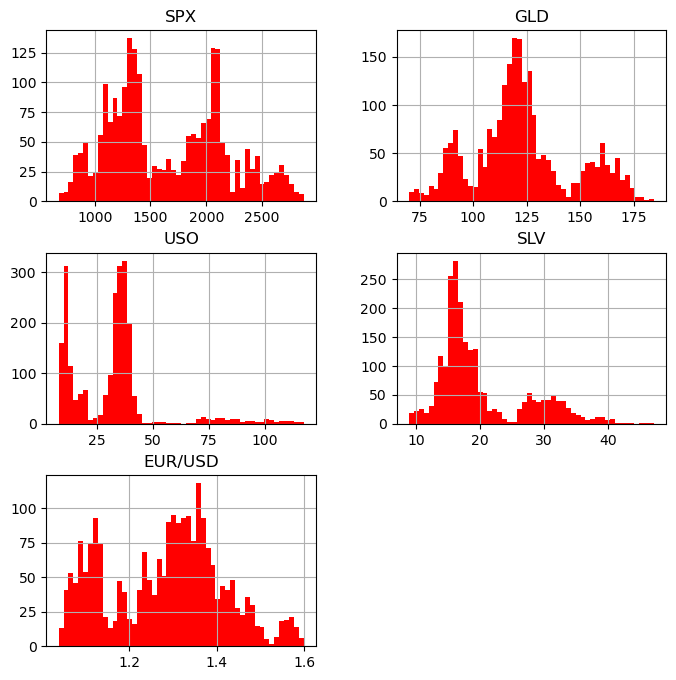

In [21]:
df1.hist(bins=50, figsize=(8,8),color='red');

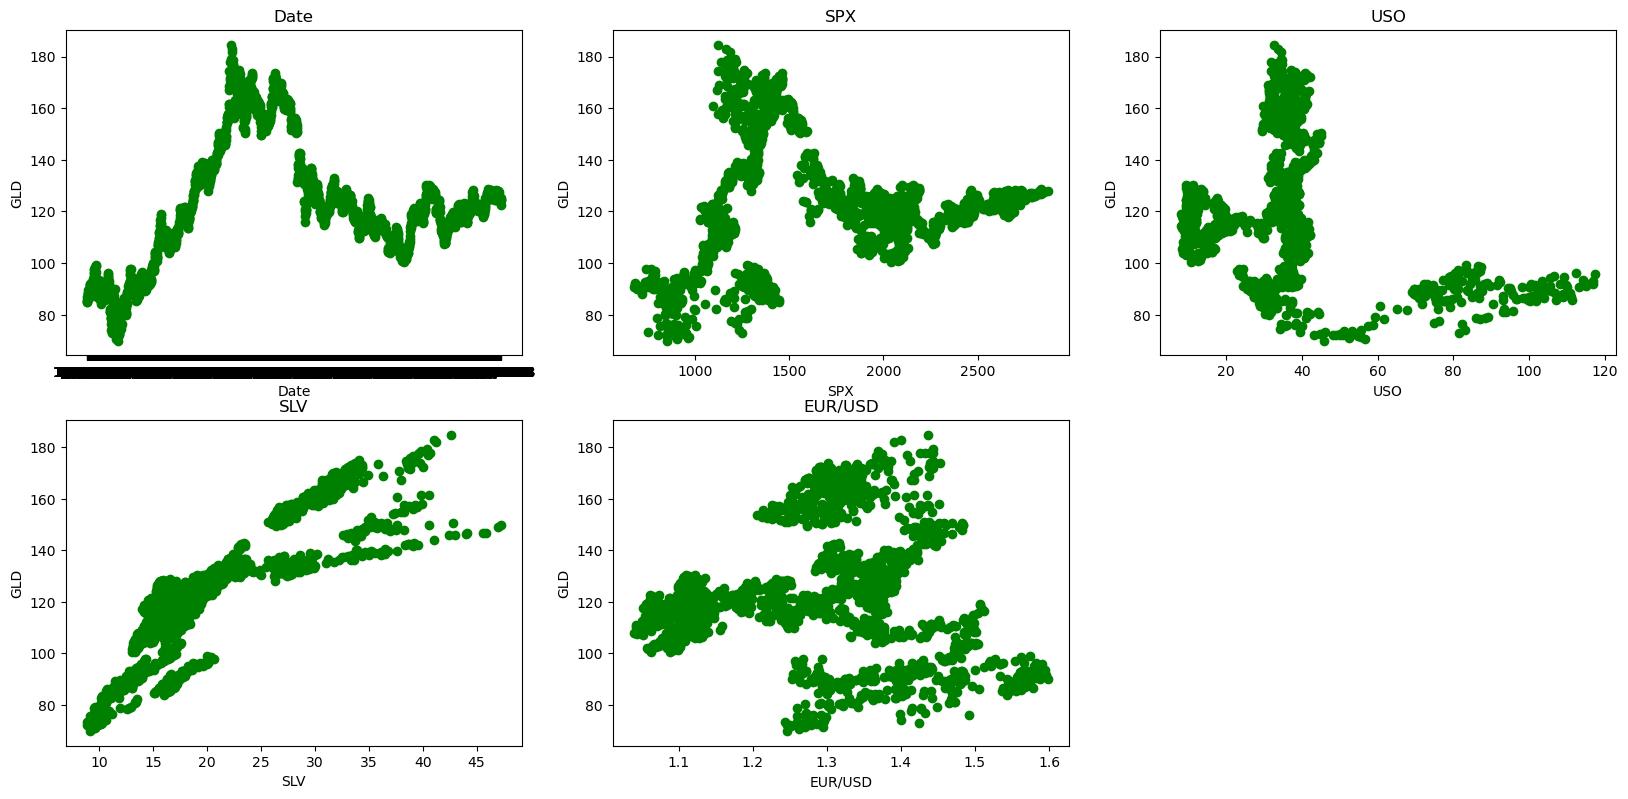

In [22]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber=1
for feature in continuous_features:
    data=df.copy()
    ax=plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],data['GLD'],color='green')
    plt.xlabel(feature)
    plt.ylabel("GLD")
    plt.title(feature)
    plotnumber+=1
plt.show()

In [23]:
df1

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [24]:
df1.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

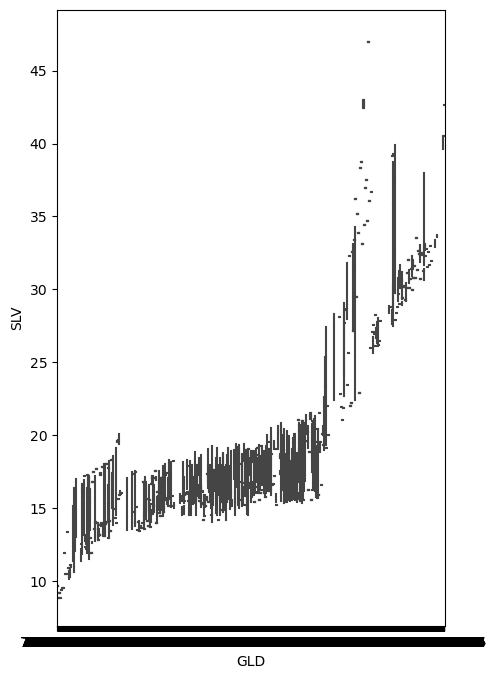

In [25]:
plt.figure(figsize=(5,8))
sns.boxplot(data=df1,x='GLD',y='SLV')
plt.show()

C:\Users\trilo\AppData\Local\Temp\ipykernel_21136\1098778870.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=df.corr()


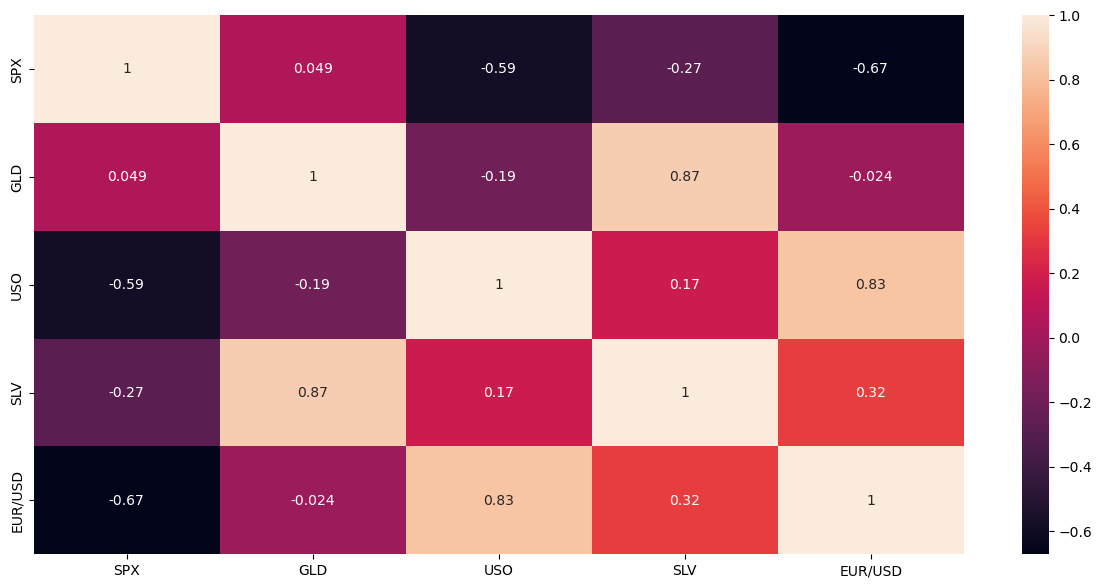

In [26]:
cor_mat=df.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)
plt.show()

In [27]:
print(cor_mat['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



In [28]:
df1=df.copy()


In [29]:
df1.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [30]:
df1.drop(['Date'],axis=1,inplace=True)

In [31]:
df1.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [32]:
x=df1.drop(['GLD'],axis=1)
y=df1['GLD']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
len(x_train)

1832

In [34]:
x_train

,SPX,USO,SLV,EUR/USD
486,1165.810059,39.560001,16.600000,1.356705
31,1349.989990,75.930000,16.952000,1.467610
1754,2041.890015,10.740000,13.080000,1.087453
1490,1862.760010,31.100000,16.670000,1.280442
1526,2026.140015,23.280001,16.370001,1.239495
...,...,...,...,...
1033,1461.050049,34.119999,33.570000,1.305824
1731,2023.040039,13.060000,13.590000,1.081502
763,1283.500000,36.009998,34.369999,1.427002
835,1218.280029,35.200001,32.330002,1.386001


In [35]:
len(x_test)

458

In [36]:
x_test

,SPX,USO,SLV,EUR/USD
1255,1692.770020,36.880001,20.980000,1.351698
2100,2425.530029,9.270000,14.990000,1.147394
711,1309.660034,42.049999,36.119999,1.410596
1328,1838.699951,33.689999,19.510000,1.361804
53,1298.420044,82.290001,18.250999,1.563893
...,...,...,...,...
2085,2429.389893,9.520000,16.040001,1.119620
1362,1877.170044,36.299999,20.010000,1.387867
828,1209.880005,33.310001,30.230000,1.376500
567,1089.469971,34.740002,17.530001,1.284406


In [37]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
reg = LinearRegression()

In [41]:
x=df1.drop(['GLD'],axis=1)
y=df1['GLD']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
x_train , x_test , y_train , y_test = train_test_split(df1 , x , test_size = 0.10,random_state =2)

In [43]:
x_train

,SPX,GLD,USO,SLV,EUR/USD
648,1258.839966,135.050003,38.639999,28.570000,1.309003
1343,1799.839966,122.919998,35.630001,19.290001,1.361934
2100,2425.530029,115.620003,9.270000,14.990000,1.147394
1990,2268.899902,113.150002,11.070000,15.910000,1.058862
1263,1692.560059,124.269997,37.099998,20.830000,1.352667
...,...,...,...,...,...
1071,1409.150024,169.610001,32.320000,32.980000,1.287515
433,1132.989990,109.800003,40.270000,17.230000,1.442398
674,1286.119995,129.869995,38.610001,27.389999,1.357276
1099,1461.890015,159.429993,33.919998,29.180000,1.306745


In [44]:
x_test

,SPX,GLD,USO,SLV,EUR/USD
903,1351.949951,168.020004,38.330002,32.900002,1.324854
129,1271.510010,81.230003,93.900002,13.450000,1.472581
1787,1880.050049,112.320000,8.910000,14.340000,1.119996
1913,2181.300049,127.589996,10.960000,18.620001,1.127142
2048,2352.949951,119.620003,10.680000,17.320000,1.067247
...,...,...,...,...,...
36,1371.800049,92.739998,78.739998,17.990000,1.483591
619,1218.709961,137.240005,38.040001,26.719999,1.377202
2172,2584.840088,121.309998,11.380000,16.090000,1.166113
1931,2136.729980,119.550003,11.580000,16.559999,1.106195


In [45]:
y_test

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247
...,...,...,...,...
36,1371.800049,78.739998,17.990000,1.483591
619,1218.709961,38.040001,26.719999,1.377202
2172,2584.840088,11.380000,16.090000,1.166113
1931,2136.729980,11.580000,16.559999,1.106195


In [46]:
y_train

,SPX,USO,SLV,EUR/USD
648,1258.839966,38.639999,28.570000,1.309003
1343,1799.839966,35.630001,19.290001,1.361934
2100,2425.530029,9.270000,14.990000,1.147394
1990,2268.899902,11.070000,15.910000,1.058862
1263,1692.560059,37.099998,20.830000,1.352667
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [47]:
reg.fit(x_train,y_train)

LinearRegression()

In [48]:
reg.score(x_test,y_test)

1.0